## 『本次練習內容』
#### 計算 Bounding Box Regression Loss

## 『本次練習目的』
  #### 了解 Proposal 與 標註框之間的轉換
  #### 這裡希望學員清楚理解我們要預測的不是實際的 (x,y,w,h)，而是他們相對應的偏置量

In [1]:
import cv2
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img_path = '../images/Tano.jpg'

# 載入圖片
img_bgr = cv2.imread( img_path )

# BGR -> RGB
img_rgb = img_bgr[ :,:,::-1 ]

## 設定 Bounding Box 格式

In [5]:
# [ 左上 x 座標, 左上 y 座標, 寬, 高 ]
Ground_Truth_BBOX = [1900,700,1800,1800]
Region_Proposal = [1800,800,1500,1500]  # 隨意設的數字，可以更改

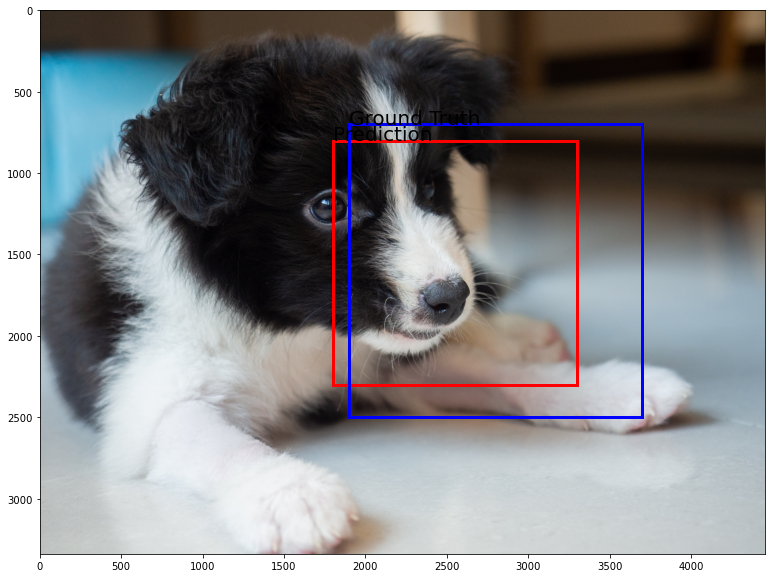

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)

fig,ax = plt.subplots(1)

# 畫出圖片
ax.imshow( img_rgb )

# 畫 Region_Proposal
rect = patches.Rectangle( (Region_Proposal[0], Region_Proposal[1]), 
                          Region_Proposal[2], Region_Proposal[3], 
                          linewidth=3, edgecolor='r', facecolor='none' )
ax.text( 1800, 800, 'Prediction', size=20 ) 

# 畫 BBOX-Ground_Truth
rect_1 = patches.Rectangle( (Ground_Truth_BBOX[0], Ground_Truth_BBOX[1]),
                            Ground_Truth_BBOX[2], Ground_Truth_BBOX[3], 
                            linewidth=3, edgecolor='b', facecolor='none' )
ax.text( 1900, 700, 'Ground Truth', size=20 )

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)

plt.show()

令 $ G = (G_x, G_y, G_w, G_h) $ 及 $ P = (P_x, P_y, P_w, P_h) $ 分別為 Ground Truth(藍框)與 Region Proposal(紅框)的座標。    
 **目標** : 尋找一個對應函數 $f$ 使得 $ f(P) = (\hat G_x, \hat G_y, \hat G_w, \hat G_h) \thickapprox G $
  
Step 1: **計算紅框與藍框的偏移量**( Region Proposal 的校正 )   

$$\displaystyle t_x = \frac{G_x-P_x}{P_w} $$
$$\displaystyle t_y = \frac{G_y-P_y}{P_h} $$
$$\displaystyle t_w = \log( \frac{G_w}{P_w} ) $$
$$\displaystyle t_h = \log( \frac{G_h}{P_h} ) $$

Step 2: **平移與尺度縮放**  
將 $P$ 轉換成 Ground Truth $\hat G$  

$$ \hat G_x = P_w \times d_x(P) + P_x  \quad\leftarrow \text{仿射} $$ 
$$ \hat G_y = P_h \times d_y(P) + P_y \quad\leftarrow \text{仿射} $$ 
$$ \hat G_w = P_w \times \exp( d_w(P) ) \quad\leftarrow \text{尺度縮放} $$
$$ \hat G_h = P_h \times \exp( d_h(P) ) \quad\leftarrow \text{尺度縮放}$$   

且透過線性迴歸估計 $ d_{*}(P) $，其中   

$$ d_{*}(P) = W^{T}_{*} \cdot \phi(P), $$    

$ \phi(P) $ 為 Region Proposal 所對應的 Feature Map 組成的特徵向量。因此，損失函數定義為   

$$ Loss = \sum_{i}^{n} |t_{*}^{i}-d_{*}(P^i)|. $$    

  
參考文章:   
- [一文讀懂 Faster RCNN](https://zhuanlan.zhihu.com/p/31426458)


## 計算 $t_{*}$ ( 按照公式寫 )   

In [5]:
tx = (Ground_Truth_BBOX[0]-Region_Proposal[0])/Region_Proposal[2]
ty = (Ground_Truth_BBOX[1]-Region_Proposal[1])/Region_Proposal[3]
tw = np.log(Ground_Truth_BBOX[2]/Region_Proposal[2])
th = np.log(Ground_Truth_BBOX[3]/Region_Proposal[3])

In [6]:
print( 'x 偏移量： ',tx )
print( 'y 偏移量： ',ty )
print( 'w 縮放量： ',tw )
print( 'h 縮放量： ',th )

x 偏移量：  0.06666666666666667
y 偏移量：  -0.06666666666666667
w 縮放量：  0.1823215567939546
h 縮放量：  0.1823215567939546


## 假設 Predict 值 dx,dy,dw,dh

In [7]:
dx,dy,dw,dh = [0.05,-0.05,0.12,0.17]

In [8]:
Loss = np.sum( np.square(np.array([tx,ty,tw,th]) - np.array([0.05,-0.05,0.12,0.17])) )

In [9]:
print( 'Loss值：',Loss )

Loss值： 0.004591352758604312
